In [93]:
import pandas as pd

In [94]:
df = pd.read_json('btp/esg_data/esg_data.json')

In [95]:
df.head()

,esg,esg_industry,industry,name,ticker
0,[],[],Mining (except Oil & Gas),20-Microns-Ltd,20MICRONS
1,"[[1622505600000, 14.44], [1625097600000, 14.46...","[[1622505600000, 13.83], [1625097600000, 12.9]...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA
2,"[[1633046400000, 36.21], [1635724800000, 35.68...","[[1633046400000, 19.94], [1635724800000, 20.25...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA
3,[],[],Brokerage & Capital Markets,A-K-CAPITAL-SERVICES-LIMITED,530499
4,[],[],"Architectural, Engineering, & Related Services",A2Z-MAINTENANCE-and-ENGINEERING-SERVICES-LIMITED,A2ZINFRA


In [96]:
# Drop the stocks that have no ESG data
df = df[df['esg'].str.len() > 0]
df.head()

,esg,esg_industry,industry,name,ticker
1,"[[1622505600000, 14.44], [1625097600000, 14.46...","[[1622505600000, 13.83], [1625097600000, 12.9]...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA
2,"[[1633046400000, 36.21], [1635724800000, 35.68...","[[1633046400000, 19.94], [1635724800000, 20.25...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA
5,"[[1622505600000, 16.98], [1625097600000, 17.08...","[[1622505600000, 26.05], [1625097600000, 26.42...",Health Care & Pharmaceuticals,Aarti-Drugs-Ltd,AARTIDRUGS
6,"[[1622505600000, 19.55], [1625097600000, 19.69...","[[1622505600000, 28.24], [1625097600000, 26.97...","Chemicals, Plastics & Rubber Products Mfg.",AARTI-INDUSTRIES-LTD,AARTIIND
8,"[[1625097600000, 52.96], [1627776000000, 69.18...","[[1625097600000, 66.0], [1627776000000, 73.21]...",Real Estate Financial Services,Aavas-Financiers-Ltd,AAVAS


In [97]:
df.shape

(756, 5)

In [98]:
# Check if all insdustries have esg data
(df['esg_industry'].str.len() > 0).sum() == df.shape[0]

True

In [99]:
# reindex the dataframe

df = df.reset_index(drop=True)

In [100]:
from datetime import datetime

def get_date(date: int) -> str:
    try:
        date = datetime.fromtimestamp(date/1000)
        return date.strftime("%Y-%m-%d")
    except TypeError:
        return str(date)

In [101]:
for i in range(len(df)):
    esg = df.at[i, 'esg']
    esg_industry = df.at[i, 'esg_industry']
    
    for j in range(len(esg_industry)):
        esg_industry[j][0] = get_date(esg_industry[j][0])
    
    for j in range(len(esg)):
        esg[j][0] = get_date(esg[j][0])
    
    df.at[i, 'esg'] = esg
    df.at[i, 'esg_industry'] = esg_industry


Analyzing the industry data

In [102]:
df[df['industry'] == 'Paper Products']

,esg,esg_industry,industry,name,ticker
410,"[[2021-06-01, 9.94], [2021-07-01, 10.01], [202...","[[2021-06-01, 11.76], [2021-07-01, 12.38], [20...",Paper Products,JK-PAPER-LIMITED,JKPAPER
718,"[[2023-05-01, 27.98]]","[[2023-05-01, 28.68]]",Paper Products,Tamil-Nadu-Newsprint-and-Papers-Limited,TNPL
754,"[[2023-05-01, 23.5]]","[[2023-05-01, 22.06]]",Paper Products,THE-WEST-COAST-PAPER-MILLS-LIMITED,WSTCSTPAPR


industry
Chemicals, Plastics & Rubber Products Mfg.    77
Construction Materials                        36
Manufacturing                                 33
Diversified Financial Services                26
Pharmaceutical & Medicine Manufacturing       25
                                              ..
National Government                            1
Property Leasing                               1
Wholesale Trade                                1
Computers & Peripherals                        1
Accounting, Tax Prep., & Payroll Services      1
Name: count, Length: 118, dtype: int64
756


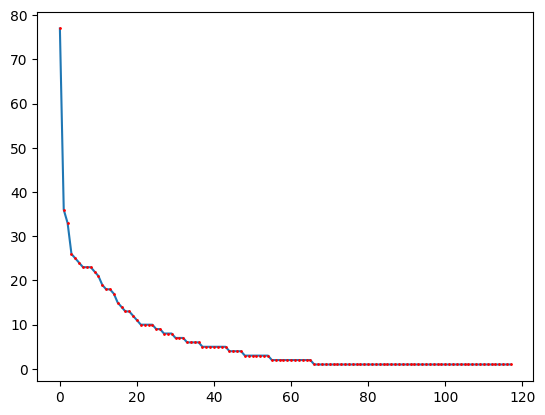

In [103]:
# number of companies in each industry
print (df['industry'].value_counts())
print (len(df))

# plot the number of companies in each industry
import matplotlib.pyplot as plt

plt.plot(df['industry'].value_counts().values)
plt.plot(df['industry'].value_counts().values, 'ro', markersize=1)

In [104]:
stockname = df['ticker'][0]
stockData = pd.read_json(f'btp/data/{stockname}.json')
stockData.head()

,c,h,l,o,s,t,v
0,2757.50,2830.00,2725.05,2725.05,ok,1277942400,971
1,2763.60,2810.00,2760.00,2810.00,ok,1278028800,263
2,2816.05,2828.00,2770.00,2799.00,ok,1278288000,728
3,2776.25,2818.95,2750.00,2800.05,ok,1278374400,348
4,2779.30,2848.00,2762.70,2848.00,ok,1278460800,199


Analyzing one of the stocks

In [105]:
stock_name = df['name'][1]
ticker = df['ticker'][1]
industry = df['industry'][1]
esg = df['esg'][1]
esg_industry = df['esg_industry'][1]

print(stock_name, esg)

5paisa-Capital-Limited [['2021-10-01', 36.21], ['2021-11-01', 35.68], ['2021-12-01', 38.08], ['2022-01-01', 30.91], ['2022-02-01', 31.74], ['2022-03-01', 29.3], ['2022-04-01', 37.48], ['2022-05-01', 37.72], ['2022-06-01', 39.97], ['2022-07-01', 39.48], ['2022-08-01', 44.48], ['2022-09-01', 44.28], ['2022-10-01', 37.7], ['2022-11-01', 38.84], ['2022-12-01', 43.03], ['2023-01-01', 42.64], ['2023-02-01', 42.19], ['2023-03-01', 42.01], ['2023-04-01', 43.95], ['2023-05-01', 44.67]]


In [106]:
#plot the esg and esg_industry data
import matplotlib.pyplot as plt
import numpy as np

def plot_esg(esg: list, esg_industry: list, stock_name: str, ticker: str, industry: str):
    esg = np.array(esg)
    esg_industry = np.array(esg_industry)

    xEsg = pd.to_datetime(esg[:, 0])
    xEsgInd = pd.to_datetime(esg_industry[:, 0]) 

    yEsg = esg[:, 1].astype(float)
    yEsgInd = esg_industry[:, 1].astype(float)
    
    plt.figure(figsize=(20, 10))
    plt.plot(xEsg, yEsg, label='ESG Score')
    plt.plot(xEsgInd, yEsgInd, label='ESG Industry Score')
    plt.xlabel('Date')
    plt.ylabel('ESG Score')
    plt.title(f'ESG Score for {stock_name} ({ticker}) in {industry}')
    plt.legend()
    plt.show()

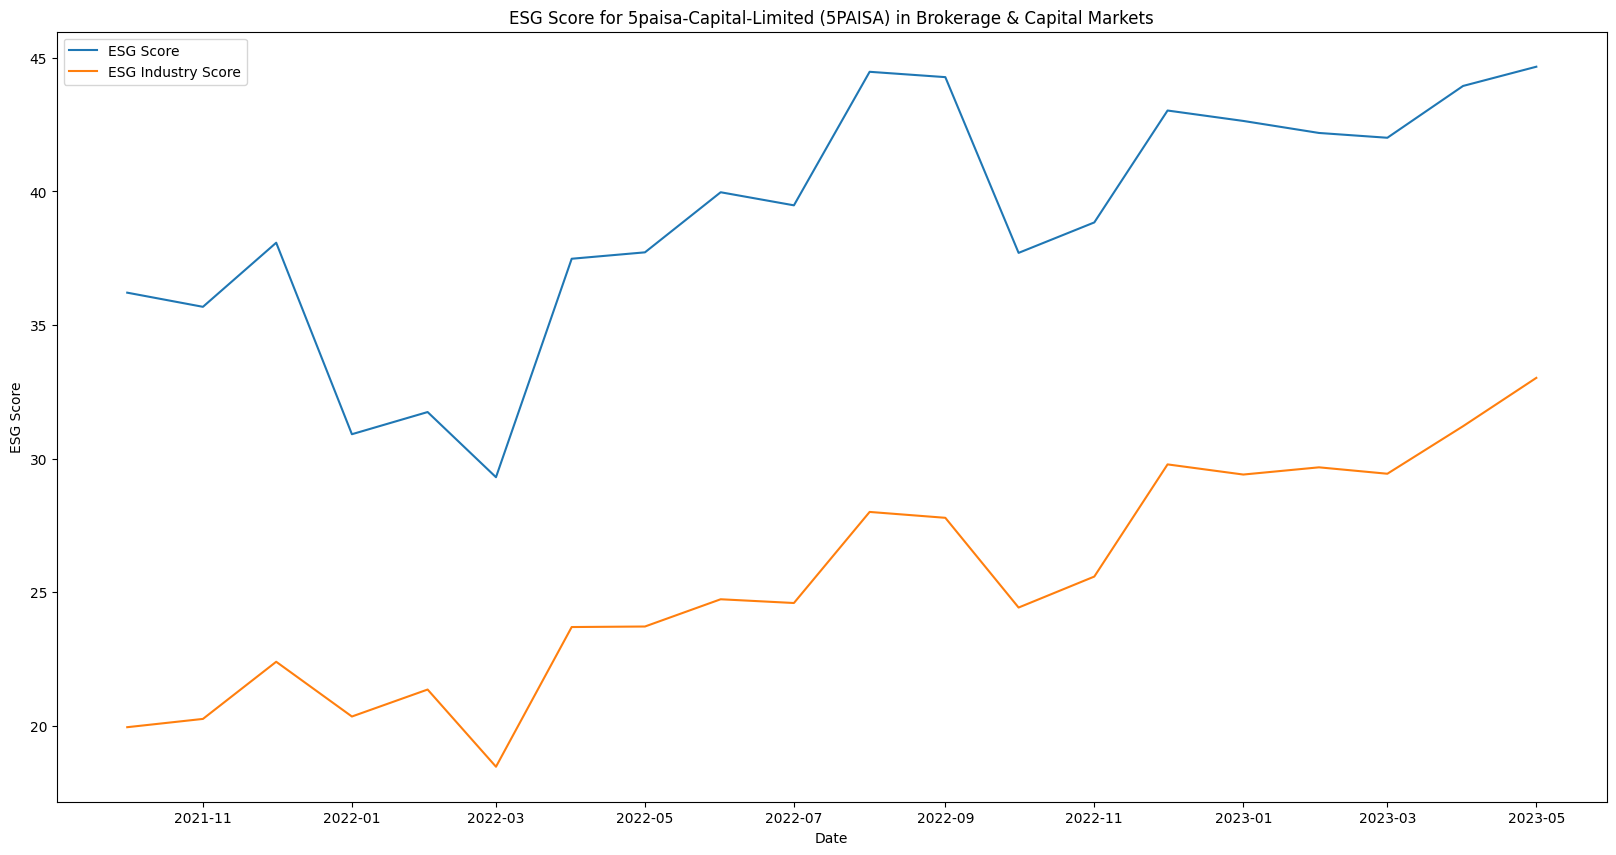

In [107]:
plot_esg(esg, esg_industry, stock_name, ticker, industry)

In [108]:
# Calculate the growth rate of the ESG score

def get_growth_rate(esg: list) -> float:
    esg = np.array(esg)
    xEsg = pd.to_datetime(esg[:, 0])
    yEsg = esg[:, 1].astype(float)

    if len(xEsg) < 2:
        return 'NAN'
    
    return (yEsg[-1] - yEsg[0]) / (xEsg[-1] - xEsg[0]).days

def df_growth_rate(df: pd.DataFrame, col = 'esg') -> float:
    growth_rates = []
    nan_gr_idx = []
    for i in range(len(df)):
        esg = df.at[i, col]
        rate = get_growth_rate(esg)
        if rate != 'NAN':
            growth_rates.append(rate)
        else:
            growth_rates.append(0)
            nan_gr_idx.append(i)
    return growth_rates, nan_gr_idx


In [109]:
df['growth_rate'], nan_gr_idx = df_growth_rate(df)
df['industry_growth_rate'], _ = df_growth_rate(df, col='esg_industry')
df = df.drop(nan_gr_idx)
df = df.reset_index(drop=True)
df.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate
0,"[[2021-06-01, 14.44], [2021-07-01, 14.46], [20...","[[2021-06-01, 13.83], [2021-07-01, 12.9], [202...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA,0.099041,0.086152
1,"[[2021-10-01, 36.21], [2021-11-01, 35.68], [20...","[[2021-10-01, 19.94], [2021-11-01, 20.25], [20...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA,0.014662,0.022669
2,"[[2021-06-01, 16.98], [2021-07-01, 17.08], [20...","[[2021-06-01, 26.05], [2021-07-01, 26.42], [20...",Health Care & Pharmaceuticals,Aarti-Drugs-Ltd,AARTIDRUGS,0.005351,0.000515
3,"[[2021-06-01, 19.55], [2021-07-01, 19.69], [20...","[[2021-06-01, 28.24], [2021-07-01, 26.97], [20...","Chemicals, Plastics & Rubber Products Mfg.",AARTI-INDUSTRIES-LTD,AARTIIND,0.087353,0.071860
4,"[[2021-07-01, 52.96], [2021-08-01, 69.18], [20...","[[2021-07-01, 66.0], [2021-08-01, 73.21], [202...",Real Estate Financial Services,Aavas-Financiers-Ltd,AAVAS,0.041674,0.034469


In [110]:
(df['growth_rate'] > df['industry_growth_rate']).sum()

406

In [111]:
df['growth_rate'].describe()

count    741.000000
mean       0.004622
std        0.064367
min       -0.486689
25%       -0.017556
50%        0.007027
75%        0.034411
max        0.498989
Name: growth_rate, dtype: float64

In [112]:
df['industry_growth_rate'].describe()

count    741.000000
mean       0.003795
std        0.063716
min       -0.458609
25%       -0.018548
50%        0.007274
75%        0.031803
max        0.431685
Name: industry_growth_rate, dtype: float64

In [113]:
# Simple Mean of ESG Score
def mean_esg(esg: list) -> float:
    esg = np.array(esg)
    yEsg = esg[:, 1].astype(float)
    return yEsg.mean()

def df_mean_esg(df: pd.DataFrame, col = 'esg', mean_func = mean_esg) -> float:
    mean_esgs = []
    for i in range(len(df)):
        esg = df.at[i, col]
        mean_esgs.append(mean_func(esg))
    return mean_esgs

In [115]:
df['mean_esg'] = df_mean_esg(df)
df['industry_mean_esg'] = df_mean_esg(df, col='esg_industry')
df.head()


,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
0,"[[2021-06-01, 14.44], [2021-07-01, 14.46], [20...","[[2021-06-01, 13.83], [2021-07-01, 12.9], [202...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA,0.099041,0.086152,56.030000,48.452917
1,"[[2021-10-01, 36.21], [2021-11-01, 35.68], [20...","[[2021-10-01, 19.94], [2021-11-01, 20.25], [20...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA,0.014662,0.022669,39.018000,25.387000
2,"[[2021-06-01, 16.98], [2021-07-01, 17.08], [20...","[[2021-06-01, 26.05], [2021-07-01, 26.42], [20...",Health Care & Pharmaceuticals,Aarti-Drugs-Ltd,AARTIDRUGS,0.005351,0.000515,21.845417,31.795833
3,"[[2021-06-01, 19.55], [2021-07-01, 19.69], [20...","[[2021-06-01, 28.24], [2021-07-01, 26.97], [20...","Chemicals, Plastics & Rubber Products Mfg.",AARTI-INDUSTRIES-LTD,AARTIIND,0.087353,0.071860,53.713333,55.423333
4,"[[2021-07-01, 52.96], [2021-08-01, 69.18], [20...","[[2021-07-01, 66.0], [2021-08-01, 73.21], [202...",Real Estate Financial Services,Aavas-Financiers-Ltd,AAVAS,0.041674,0.034469,70.727826,76.606522


In [116]:
df['mean_esg'].describe()

count    741.000000
mean      53.499096
std       25.027887
min        0.220000
25%       34.621250
50%       55.452941
75%       72.923750
max       99.937500
Name: mean_esg, dtype: float64

In [117]:
df['industry_mean_esg'].describe()

count    741.000000
mean      52.168476
std       24.734309
min        0.000000
25%       33.990000
50%       52.805417
75%       71.542500
max      100.000000
Name: industry_mean_esg, dtype: float64

In [118]:
(df['mean_esg'] > df['industry_mean_esg']).sum()

398